# Importing required libraries

In [1]:
import librosa
import numpy as np
import soundfile as sf
from scipy import signal
import IPython.display as ipd
import matplotlib.pyplot as plt

# Loading the audio data and finding out it's sampling frequency

In [2]:
y, sr = librosa.load("breathing.wav", sr= None) # reading the audio file with librosa
print(f"sampling frequency is: {sr} Hz")

sampling frequency is: 44100 Hz


In [3]:
ipd.Audio('breathing.wav') #displaying the audio file to listen so we don't have to go to the folder to listen it again and again

# Visualising input signal

## Plotting the signal in time domain

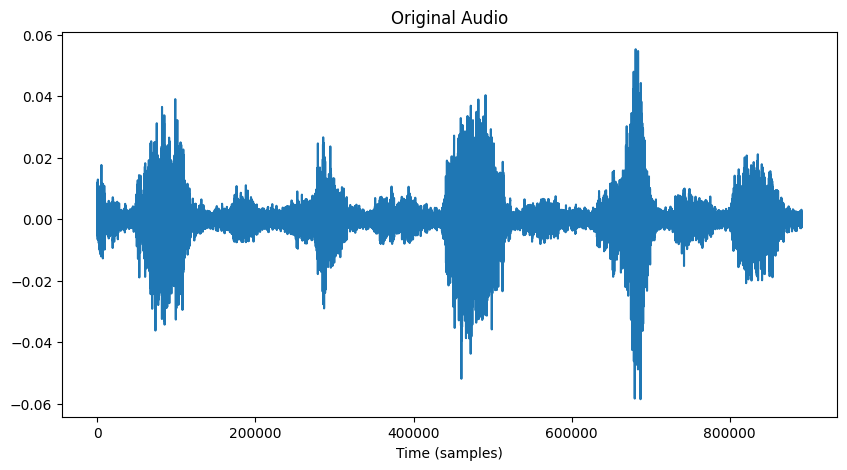

In [4]:
# simpliy ploting the graph of recorded signal
plt.figure(figsize=(10, 5))
plt.plot(y, label="Original Audio")
plt.xlabel("Time (samples)")
plt.title("Original Audio")
plt.show()

## Plotting the signal in frequency domain

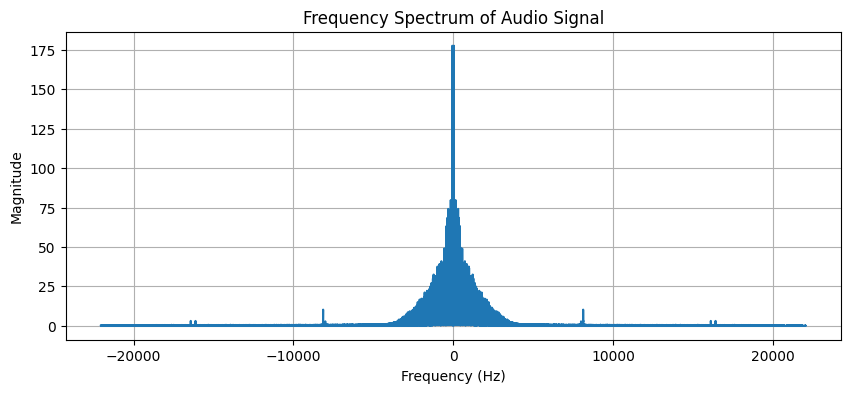

In [5]:
# Calculating the Fast Fourier Transform (FFT) of the audio data using numpy
fft_output = np.fft.fft(y)
# from here just taking the values of the frequecies and amplitude
length = len(y)
fft_output_shifted = np.fft.fftshift(fft_output)
freq_bins = np.fft.fftfreq(length, d=1/sr)
freq_bins_shifted = np.fft.fftshift(freq_bins)
fft_magnitude_shifted = np.abs(fft_output_shifted)

# Plot the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(freq_bins_shifted, fft_magnitude_shifted)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Audio Signal')
plt.grid(True)
plt.show()


## Observing input signal's power spectogram to find out the range of breathing frequencies

/var/folders/4c/fm37lb8569ng2zcdst4lxzv80000gn/T/ipykernel_14486/3635365365.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(spectrogram,


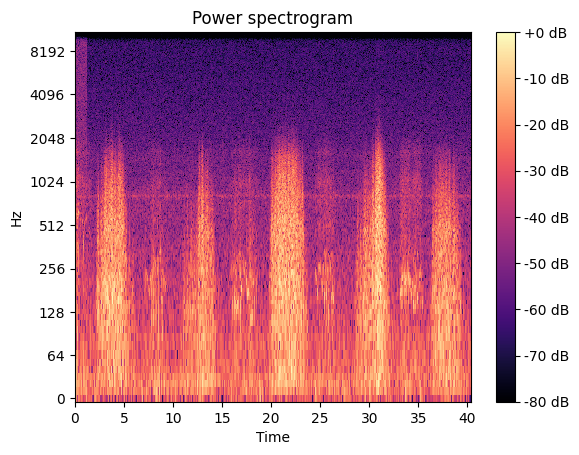

In [6]:
# plotting the spectogram using the inbuilt functions of librosa and matplotlib
spectrogram = librosa.stft(y)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time',ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

# Filtering the signal using Butterworth lowpass filter

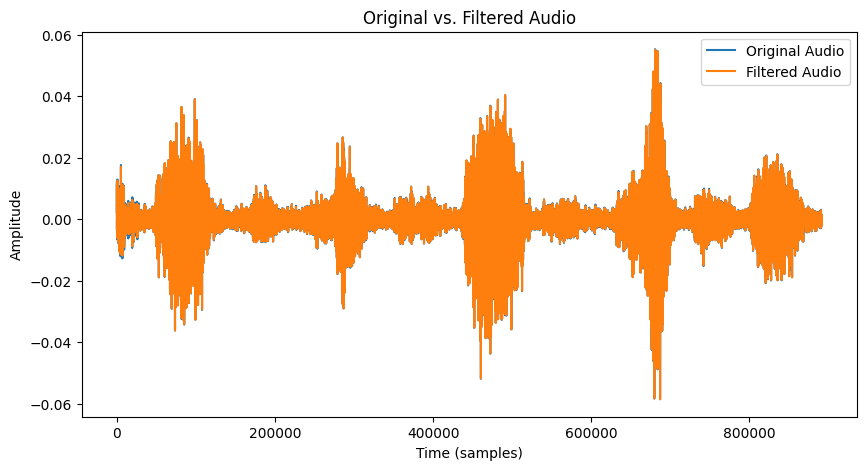

In [7]:
nyquist_freq = sr / 2 # nyquist rate should be atleast equal to sampling rate otherwise the signal won't be recoverable
cutoff_freq = 5000  # Set the cutoff frequency (in Hz)
order = 4  # Set the filter order

# Design a low-pass Butterworth filter using scipy
b, a = signal.butter(order, cutoff_freq / nyquist_freq, btype='low')

# Apply the filter to the audio signal
filtered_y = signal.filtfilt(b, a, y)

# Plot original and filtered audio
plt.figure(figsize=(10, 5))
plt.plot(y, label="Original Audio")
plt.plot(filtered_y, label="Filtered Audio")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original vs. Filtered Audio")
plt.show()



## Ploting the filtered signal in frequency domain

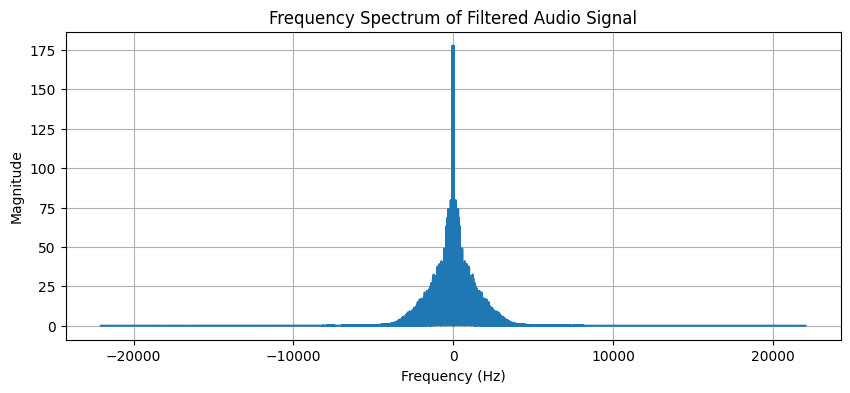

In [8]:
# Calculate the Fast Fourier Transform (FFT) of the audio data
fft_output = np.fft.fft(filtered_y)
length = len(filtered_y)
fft_output_shifted = np.fft.fftshift(fft_output)
freq_bins = np.fft.fftfreq(length, d=1/sr)
freq_bins_shifted = np.fft.fftshift(freq_bins)
fft_magnitude_shifted = np.abs(fft_output_shifted)

# Plot the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(freq_bins_shifted, fft_magnitude_shifted)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Filtered Audio Signal')
plt.grid(True)
plt.show()


## Ploting the Power Spectogram of filtered signal

/var/folders/4c/fm37lb8569ng2zcdst4lxzv80000gn/T/ipykernel_14486/4104096304.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(spectrogram,


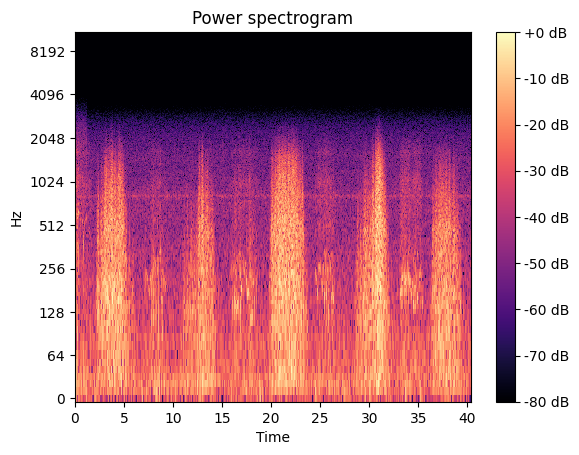

In [9]:
# plotting the spectogram using the inbuilt functions of librosa and matplotlib
spectrogram = librosa.stft(filtered_y)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time',ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()



# Saving the filtered audio

In [10]:
# Save the filtered audio
filtered_audio_file = 'breathing_filtered_librosa.wav'
sf.write(filtered_audio_file, filtered_y, sr)

In [11]:
ipd.Audio('breathing_filtered_librosa.wav')